In [95]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

In [96]:
csv_link="../dataset/percobaan.csv"

In [97]:
# TODO: Create more data
dataframe = pd.read_csv(csv_link)

In [98]:
dataframe.head()

,Skintone,Season,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,g4,b4
0,white,spring,239,124,142,250,232,224,182,226,211,216,167,177
1,white,summer,232,180,184,238,214,211,164,147,147,103,89,94
2,white,spring,251,231,198,180,248,200,160,231,229,255,174,188
3,white,summer,5,68,94,24,154,180,117,230,218,212,241,244
4,white,summer,231,210,204,185,183,189,134,139,142,238,237,231


In [99]:
dataframe = pd.get_dummies(dataframe, columns=['Skintone', 'Season'])
dataframe

,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,g4,b4,Skintone_darkbrown,Skintone_olive,Skintone_white,Season_autumn,Season_spring,Season_summer,Season_winter
0,239,124,142,250,232,224,182,226,211,216,167,177,False,False,True,False,True,False,False
1,232,180,184,238,214,211,164,147,147,103,89,94,False,False,True,False,False,True,False
2,251,231,198,180,248,200,160,231,229,255,174,188,False,False,True,False,True,False,False
3,5,68,94,24,154,180,117,230,218,212,241,244,False,False,True,False,False,True,False
4,231,210,204,185,183,189,134,139,142,238,237,231,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,162,196,224,247,203,45,13,101,157,19,144,224,False,False,True,False,True,False,False
316,240,237,224,67,63,48,151,12,16,145,142,128,False,True,False,True,False,False,False
317,231,132,132,252,164,162,71,211,206,200,244,249,False,False,True,False,True,False,False
318,47,243,224,255,128,0,224,157,96,31,57,96,True,False,False,False,True,False,False


In [100]:
train_dataset = dataframe.sample(frac=0.8, random_state=9) #train = 80%,  random_state = any int value means every time when you run your program you will get the same output for train and test dataset, random_state is None by default which means every time when you run your program you will get different output because of splitting between train and test varies within 
test_dataset = dataframe.drop(train_dataset.index) #remove train_dataset from dataframe to get test_dataset
train_dataset

,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,g4,b4,Skintone_darkbrown,Skintone_olive,Skintone_white,Season_autumn,Season_spring,Season_summer,Season_winter
31,66,151,160,244,234,230,229,127,132,47,80,97,True,False,False,False,True,False,False
95,187,167,140,239,234,228,244,198,212,243,219,178,False,False,True,False,True,False,False
109,153,176,176,181,178,176,252,250,240,138,158,160,True,False,False,False,False,False,True
310,58,106,89,167,168,138,214,193,138,185,200,188,False,False,True,False,False,False,True
98,255,176,103,255,237,134,162,220,231,248,204,220,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,180,170,169,255,240,223,248,250,253,240,201,179,True,False,False,True,False,False,False
199,225,161,64,83,34,0,239,207,160,145,65,16,False,True,False,True,False,False,False
157,94,55,109,189,151,203,243,234,192,116,112,128,False,False,True,False,False,True,False
203,25,2,4,255,137,118,203,78,71,255,203,164,False,False,True,False,False,True,False


In [101]:
test_dataset

,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,g4,b4,Skintone_darkbrown,Skintone_olive,Skintone_white,Season_autumn,Season_spring,Season_summer,Season_winter
1,232,180,184,238,214,211,164,147,147,103,89,94,False,False,True,False,False,True,False
12,65,114,159,88,133,175,39,68,114,195,224,229,False,False,True,False,False,False,True
22,10,112,41,254,222,0,200,223,82,219,232,216,True,False,False,False,True,False,False
24,104,187,227,14,134,212,5,92,157,0,48,96,False,False,True,False,False,False,True
40,253,127,32,252,46,32,253,183,80,1,1,0,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,240,216,184,99,79,64,243,240,233,230,183,148,False,False,True,False,False,True,False
279,107,27,0,174,139,112,249,254,251,86,56,45,True,False,False,False,False,True,False
289,247,216,217,161,219,229,255,216,192,0,183,175,False,False,True,True,False,False,False
296,245,99,26,254,235,160,212,30,0,72,29,1,False,False,True,False,False,True,False


In [102]:
# train_labels = pd.DataFrame([train_dataset.pop(x) for x in ['Skintone_white', 'Skintone_olive', 'Skintone_darkbrown', 'Season_summer', 'Season_winter', 'Season_autumn', 'Season_spring']]).T
# train_labels
train_labels_skintone = pd.DataFrame([train_dataset.pop(x) for x in ['Skintone_white', 'Skintone_olive', 'Skintone_darkbrown']]).T
train_labels_seasons = pd.DataFrame([train_dataset.pop(x) for x in ['Season_summer', 'Season_winter', 'Season_autumn', 'Season_spring']]).T


In [103]:
train_dataset

,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,g4,b4
31,66,151,160,244,234,230,229,127,132,47,80,97
95,187,167,140,239,234,228,244,198,212,243,219,178
109,153,176,176,181,178,176,252,250,240,138,158,160
310,58,106,89,167,168,138,214,193,138,185,200,188
98,255,176,103,255,237,134,162,220,231,248,204,220
...,...,...,...,...,...,...,...,...,...,...,...,...
91,180,170,169,255,240,223,248,250,253,240,201,179
199,225,161,64,83,34,0,239,207,160,145,65,16
157,94,55,109,189,151,203,243,234,192,116,112,128
203,25,2,4,255,137,118,203,78,71,255,203,164


In [104]:
# test_labels = pd.DataFrame([test_dataset.pop(x) for x in ['Skintone_white', 'Skintone_olive', 'Skintone_darkbrown', 'Season_summer', 'Season_winter', 'Season_autumn', 'Season_spring']]).T
# test_labels
test_labels_skintone = pd.DataFrame([test_dataset.pop(x) for x in ['Skintone_white', 'Skintone_olive', 'Skintone_darkbrown']]).T
test_labels_seasons = pd.DataFrame([test_dataset.pop(x) for x in ['Season_summer', 'Season_winter', 'Season_autumn', 'Season_spring']]).T


In [105]:
test_dataset

,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,g4,b4
1,232,180,184,238,214,211,164,147,147,103,89,94
12,65,114,159,88,133,175,39,68,114,195,224,229
22,10,112,41,254,222,0,200,223,82,219,232,216
24,104,187,227,14,134,212,5,92,157,0,48,96
40,253,127,32,252,46,32,253,183,80,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
278,240,216,184,99,79,64,243,240,233,230,183,148
279,107,27,0,174,139,112,249,254,251,86,56,45
289,247,216,217,161,219,229,255,216,192,0,183,175
296,245,99,26,254,235,160,212,30,0,72,29,1


In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_dataset=scaler.fit_transform(train_dataset)
test_dataset=scaler.fit_transform(test_dataset)

In [107]:
from keras import regularizers
# Hidden layers
inputs = tf.keras.Input((12,))
x = layers.Dense(24, activation='relu')(inputs)
x = layers.Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.001))(x)
x = layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.001))(x)
x=layers.Dropout(0.2)(x)
x = layers.Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.001))(x)

# Skintone output
skintone_output = layers.Dense(3, activation='softmax', name='skintone')(x)

# Season output
season_output = layers.Dense(4, activation='softmax', name='season')(x)

# Define the model
model = tf.keras.Model(inputs=inputs, outputs=[skintone_output, season_output])


In [108]:
loss_function = tf.keras.losses.CategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop(learning_rate=0.001)

In [109]:
model.compile(optimizer=optimizer,
              loss={'skintone': loss_function, 'season': loss_function},
              metrics={'skintone': 'accuracy', 'season': 'accuracy'})

In [110]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 12)]         0           []                               
                                                                                                  
 dense_21 (Dense)               (None, 24)           312         ['input_5[0][0]']                
                                                                                                  
 dense_22 (Dense)               (None, 32)           800         ['dense_21[0][0]']               
                                                                                                  
 dense_23 (Dense)               (None, 256)          8448        ['dense_22[0][0]']               
                                                                                            

In [111]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [112]:

history = model.fit(x=train_dataset, y={'skintone': train_labels_skintone, 'season': train_labels_seasons}, 
                        validation_split=0.2, 
                        epochs=100, 
                        batch_size=12, 
                        verbose=1,
                        callbacks=[tfdocs.modeling.EpochDots()], 
                        shuffle=True)

Epoch 1/100


 1/17 [>.............................] - ETA: 14s - loss: 2.6636 - skintone_loss: 1.0682 - season_loss: 1.3658 - skintone_accuracy: 0.5833 - season_accuracy: 0.3333
Epoch: 0, loss:2.6632,  season_accuracy:0.3137,  season_loss:1.3815,  skintone_accuracy:0.4706,  skintone_loss:1.0642,  val_loss:2.7294,  val_season_accuracy:0.2115,  val_season_loss:1.3949,  val_skintone_accuracy:0.3654,  val_skintone_loss:1.1284,  
17/17 [==============================] - 1s 18ms/step - loss: 2.6632 - skintone_loss: 1.0642 - season_loss: 1.3815 - skintone_accuracy: 0.4706 - season_accuracy: 0.3137 - val_loss: 2.7294 - val_skintone_loss: 1.1284 - val_season_loss: 1.3949 - val_skintone_accuracy: 0.3654 - val_season_accuracy: 0.2115
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 2.6158 - skintone_loss: 1.0496 - season_loss: 1.3685 - skintone_accuracy: 0.4755 - season_accuracy: 0.2941 - val_loss: 2.6714 - val_skintone_loss: 1.1065 - val_season_loss: 1.3763 - val_skintone_accuracy: 0.

In [113]:
# history=train()

In [114]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,skintone_loss,season_loss,skintone_accuracy,season_accuracy,val_loss,val_skintone_loss,val_season_loss,val_skintone_accuracy,val_season_accuracy,epoch
95,1.626682,0.606359,0.867878,0.764706,0.612745,3.476128,1.368971,1.954397,0.442308,0.269231,95
96,1.630068,0.586956,0.889753,0.764706,0.651961,3.414200,1.240364,2.020043,0.480769,0.230769,96
97,1.659901,0.596338,0.909349,0.740196,0.622549,3.581058,1.384683,2.041830,0.480769,0.326923,97
98,1.651864,0.607558,0.889188,0.784314,0.598039,3.476152,1.282343,2.038530,0.461538,0.269231,98
99,1.619728,0.570920,0.893119,0.774510,0.622549,3.684257,1.468498,2.059537,0.500000,0.250000,99


In [115]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'accuracy [Color]')

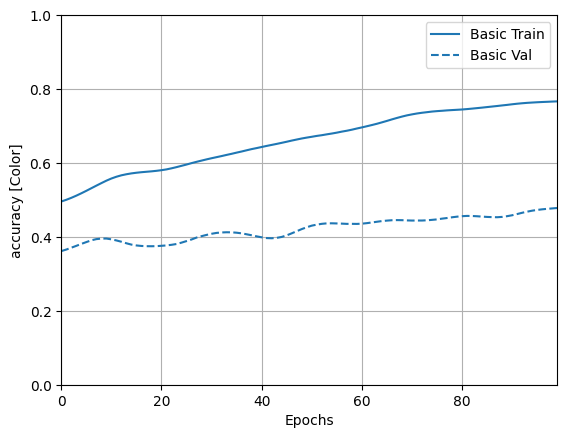

In [116]:
plotter.plot({'Basic': history}, metric = "skintone_accuracy")
plt.ylim([0, 1])
plt.ylabel('accuracy [Color]')

Text(0, 0.5, 'accuracy [Color]')

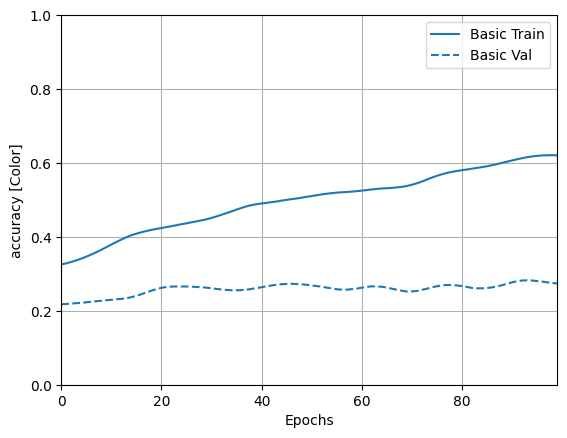

In [117]:
plotter.plot({'Basic': history}, metric = "season_accuracy")
plt.ylim([0, 1])
plt.ylabel('accuracy [Color]')

Text(0, 0.5, 'loss [Color]')

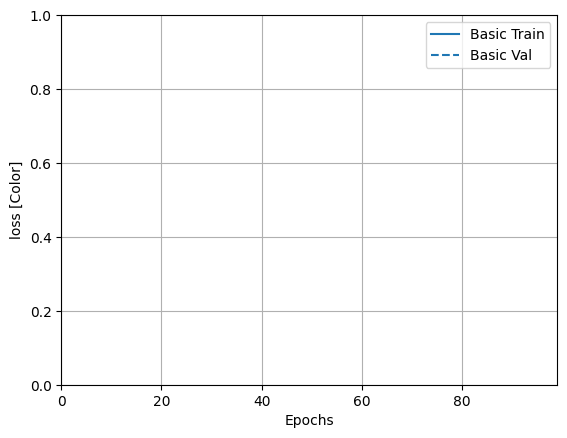

In [118]:
plotter.plot({'Basic': history}, metric = "loss")
plt.ylim([0, 1])
plt.ylabel('loss [Color]')

Text(0, 0.5, 'loss [Color]')

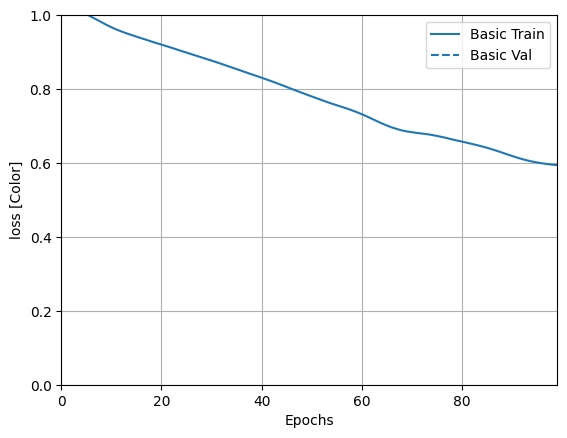

In [119]:
plotter.plot({'Basic': history}, metric = "skintone_loss")
plt.ylim([0, 1])
plt.ylabel('loss [Color]')

Text(0, 0.5, 'loss [Color]')

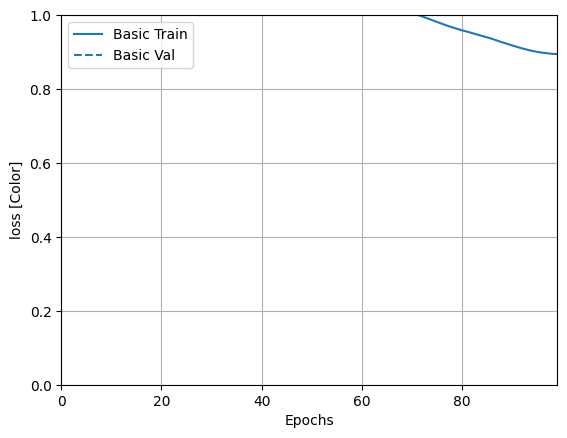

In [120]:
plotter.plot({'Basic': history}, metric = "season_loss")
plt.ylim([0, 1])
plt.ylabel('loss [Color]')

In [121]:
model.evaluate(x=train_dataset, y=train_labels_seasons)

ValueError: in user code:

    File "d:\Github\Capstone-ChromaMatch\.venv\lib\site-packages\keras\engine\training.py", line 1852, in test_function  *
        return step_function(self, iterator)
    File "d:\Github\Capstone-ChromaMatch\.venv\lib\site-packages\keras\engine\training.py", line 1836, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\Github\Capstone-ChromaMatch\.venv\lib\site-packages\keras\engine\training.py", line 1824, in run_step  **
        outputs = model.test_step(data)
    File "d:\Github\Capstone-ChromaMatch\.venv\lib\site-packages\keras\engine\training.py", line 1790, in test_step
        self.compute_loss(x, y, y_pred, sample_weight)
    File "d:\Github\Capstone-ChromaMatch\.venv\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "d:\Github\Capstone-ChromaMatch\.venv\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "d:\Github\Capstone-ChromaMatch\.venv\lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "d:\Github\Capstone-ChromaMatch\.venv\lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "d:\Github\Capstone-ChromaMatch\.venv\lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "d:\Github\Capstone-ChromaMatch\.venv\lib\site-packages\keras\backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32, 4) and (32, 3) are incompatible


In [ ]:
# model.evaluate(x=test_dataset, y=test_)

NameError: name 'test_labels' is not defined

In [ ]:
data=[[255,158,114,182,141,64,244,235,208,18,38,32]]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data=scaler.fit_transform(data)
predictions = model.predict(data)
predictions= predictions
# Print the predictions
print(predictions[1])

1/1 [==============================] - 0s 68ms/step
[[0.0490647  0.6557755  0.28741902 0.00774079]]


In [ ]:
# model.save("tone_prediction", save_format='h5')
# model.save("tone_prediction.h5")


In [ ]:
# reconstructed_model = keras.models.load_model("tone_prediction.h5")

In [ ]:
# reconstructed_model.summary()

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_526 (Dense)           (None, 32)                416       
                                                                 
 dense_527 (Dense)           (None, 24)                792       
                                                                 
 dense_528 (Dense)           (None, 32)                800       
                                                                 
 dense_529 (Dense)           (None, 64)                2112      
                                                                 
 dense_530 (Dense)           (None, 32)                2080      
                                                                 
 dense_531 (Dense)           (None, 24)                792       
                                                                 
 dense_532 (Dense)           (None, 16)              

In [ ]:
# data=[[255,158,114,182,141,64,244,235,208,18,38,32]]
# predictions = reconstructed_model.predict(data)
# predictions= predictions*100
# # Print the predictions
# print(predictions)

In [ ]:
# reconstructed_model = keras.models.load_model("tone_prediction.h5")
# reversed_layers = list(reversed(reconstructed_model.layers))
# reversed_model = tf.keras.models.Sequential(reversed_layers)


In [ ]:
# data=np.array([[0.08542435, 0.00977156, 0.01834051, 0.02325298, 0.01231119, 0.0082467, 0.02043331]])
# predictions=reversed_model.predict(data)
# print(predictions)

In [ ]:
#plt.imshow([[[x / 255 for x in test_input[0]]]])
#plt.show()

# plt.imshow([[[x / 255 for x in predictions[0][0:3]]]])
# plt.show()
# plt.imshow([[[x / 255 for x in predictions[0][3:6]]]])
# plt.show()
# plt.imshow([[[x / 255 for x in predictions[0][6:9]]]])
# plt.show()